<a href="https://colab.research.google.com/github/srijavarala/neural-networks/blob/main/icp3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Define file path (update this path based on where you uploaded the file in Google Drive)
file_path = "/content/data.csv"

# Read the CSV file
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   Duration  Pulse  Maxpulse  Calories
0        60    110       130     409.1
1        60    117       145     479.0
2        60    103       135     340.0
3        45    109       175     282.4
4        45    117       148     406.0


In [ ]:
# Import necessary libraries
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [ ]:
#Display basic statistics
print("Basic Statistics:\n", df.describe())

# Check for null values
print("\nNull Values in Each Column:\n", df.isnull().sum())

# Replace null values with column means
df.fillna(df.mean(), inplace=True)

Basic Statistics:
          Duration       Pulse    Maxpulse     Calories
count  169.000000  169.000000  169.000000   164.000000
mean    63.846154  107.461538  134.047337   375.790244
std     42.299949   14.510259   16.450434   266.379919
min     15.000000   80.000000  100.000000    50.300000
25%     45.000000  100.000000  124.000000   250.925000
50%     60.000000  105.000000  131.000000   318.600000
75%     60.000000  111.000000  141.000000   387.600000
max    300.000000  159.000000  184.000000  1860.400000

Null Values in Each Column:
 Duration    0
Pulse       0
Maxpulse    0
Calories    5
dtype: int64


In [ ]:

# Aggregate the data for selected columns
aggregated_data = df[['Duration', 'Calories']].agg(['min', 'max', 'count', 'mean'])
print("\nAggregated Data:\n", aggregated_data)



Aggregated Data:
          Duration     Calories
min     15.000000    50.300000
max    300.000000  1860.400000
count  169.000000   169.000000
mean    63.846154   375.790244


In [ ]:
# Filter data (Calories between 500 and 1000)
df1 = df[(df['Calories'] >= 500) & (df['Calories'] <= 1000)]
print("\nFiltered Data (Calories between 500 and 1000):\n", df1)


Filtered Data (Calories between 500 and 1000):
      Duration  Pulse  Maxpulse  Calories
51         80    123       146     643.1
62        160    109       135     853.0
65        180     90       130     800.4
66        150    105       135     873.4
67        150    107       130     816.0
72         90    100       127     700.0
73        150     97       127     953.2
75         90     98       125     563.2
78        120    100       130     500.4
83        120    100       130     500.0
90        180    101       127     600.1
99         90     93       124     604.1
101        90     90       110     500.0
102        90     90       100     500.0
103        90     90       100     500.4
106       180     90       120     800.3
108        90     90       120     500.3


In [ ]:
# Filter data (Calories > 500 and Pulse < 100)
df2 = df[(df['Calories'] > 500) & (df['Pulse'] < 100)]
print("\nFiltered Data (Calories > 500 & Pulse < 100):\n", df2)


Filtered Data (Calories > 500 & Pulse < 100):
      Duration  Pulse  Maxpulse  Calories
65        180     90       130     800.4
70        150     97       129    1115.0
73        150     97       127     953.2
75         90     98       125     563.2
99         90     93       124     604.1
103        90     90       100     500.4
106       180     90       120     800.3
108        90     90       120     500.3


In [ ]:
# Create a modified dataframe without 'Maxpulse'
df_modified = df.drop(columns=['Maxpulse'])

# Delete 'Maxpulse' from main dataframe
df.drop(columns=['Maxpulse'], inplace=True)

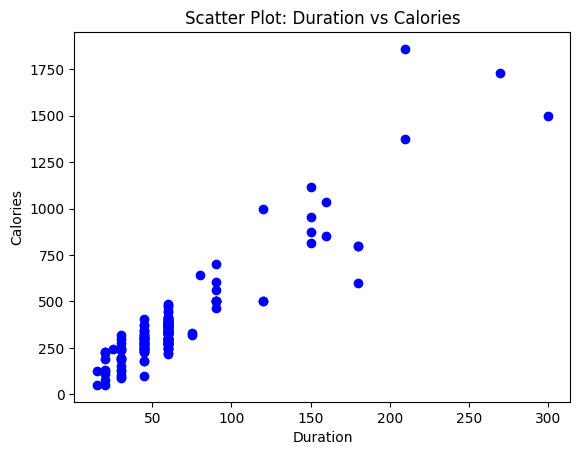

In [ ]:
# Convert 'Calories' column to int datatype
df['Calories'] = df['Calories'].astype(int)

# Scatter plot: Duration vs Calories
plt.scatter(df['Duration'], df['Calories'], color="blue")
plt.xlabel("Duration")
plt.ylabel("Calories")
plt.title("Scatter Plot: Duration vs Calories")
plt.show()

In [ ]:
 #========== LINEAR REGRESSION ==========

# Load Salary_Data.csv (update path if needed)
salary_file_path = "/content/Salary_Data.csv"
salary_df = pd.read_csv(salary_file_path)

# Splitting data into training (67%) and testing (33%)
X = salary_df[['YearsExperience']]  # Feature
y = salary_df['Salary']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42)

# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("\nMean Squared Error:", mse)


Mean Squared Error: 35301898.887134895


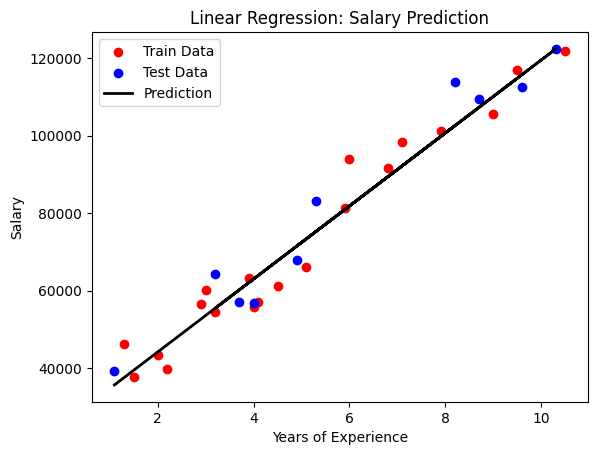

In [ ]:
# Scatter Plot: Training Data
plt.scatter(X_train, y_train, color="red", label="Train Data")
plt.scatter(X_test, y_test, color="blue", label="Test Data")
plt.plot(X_test, y_pred, color="black", linewidth=2, label="Prediction")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Linear Regression: Salary Prediction")
plt.legend()
plt.show()